In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [103]:
data = pd.read_csv('dataset/spotify_tracks_cleaned.csv')
data.head(2)

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language,genre,tempo_scaled
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",-0.951606,0.527383,97297.0,...,0.362973,0.0,0.107404,138.763595,4.0,-0.077387,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil,Electronic/Dance,139.432709
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,-0.829116,0.582150,207369.0,...,0.362973,0.0,0.099270,206.269534,3.0,0.650251,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil,Electronic/Dance,206.658505


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [112]:
data.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language', 'genre', 'tempo_scaled'],
      dtype='object')

In [104]:
data.describe()

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,tempo_scaled
count,62317.000000,62317.000000,62317.000000,62317.000000,6.231700e+04,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000
mean,2014.425935,15.358361,-0.271056,0.212419,2.425270e+05,0.206834,0.146923,5.105028,0.195165,0.362980,0.587175,0.092087,147.516041,3.859894,-0.002868,148.065627
std,9.645113,18.626908,0.628419,0.369822,1.129999e+05,0.486394,0.306929,3.550525,0.170033,0.003552,0.492346,0.117028,35.466570,0.489306,0.527445,35.493371
min,1971.000000,0.000000,-1.000000,-1.000000,5.000000e+03,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2011.000000,0.000000,-0.864659,0.010142,1.921600e+05,-0.120000,0.000000,2.000000,0.093387,0.362973,0.000000,0.038269,119.957495,4.000000,-0.411055,120.689712
50%,2017.000000,7.000000,-0.425703,0.279919,2.362670e+05,0.278000,0.000025,5.000000,0.125251,0.362973,1.000000,0.050991,147.514689,4.000000,0.021106,148.140017
75%,2022.000000,26.000000,0.269076,0.480730,2.862400e+05,0.606000,0.015215,8.000000,0.243487,0.362973,1.000000,0.092909,168.872359,4.000000,0.427136,169.416525
max,2024.000000,93.000000,1.000000,1.000000,4.581483e+06,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,300.000000,5.000000,1.000000,300.000000


In [130]:
data.dropna(inplace=True)
df = pd.DataFrame(data)

[]

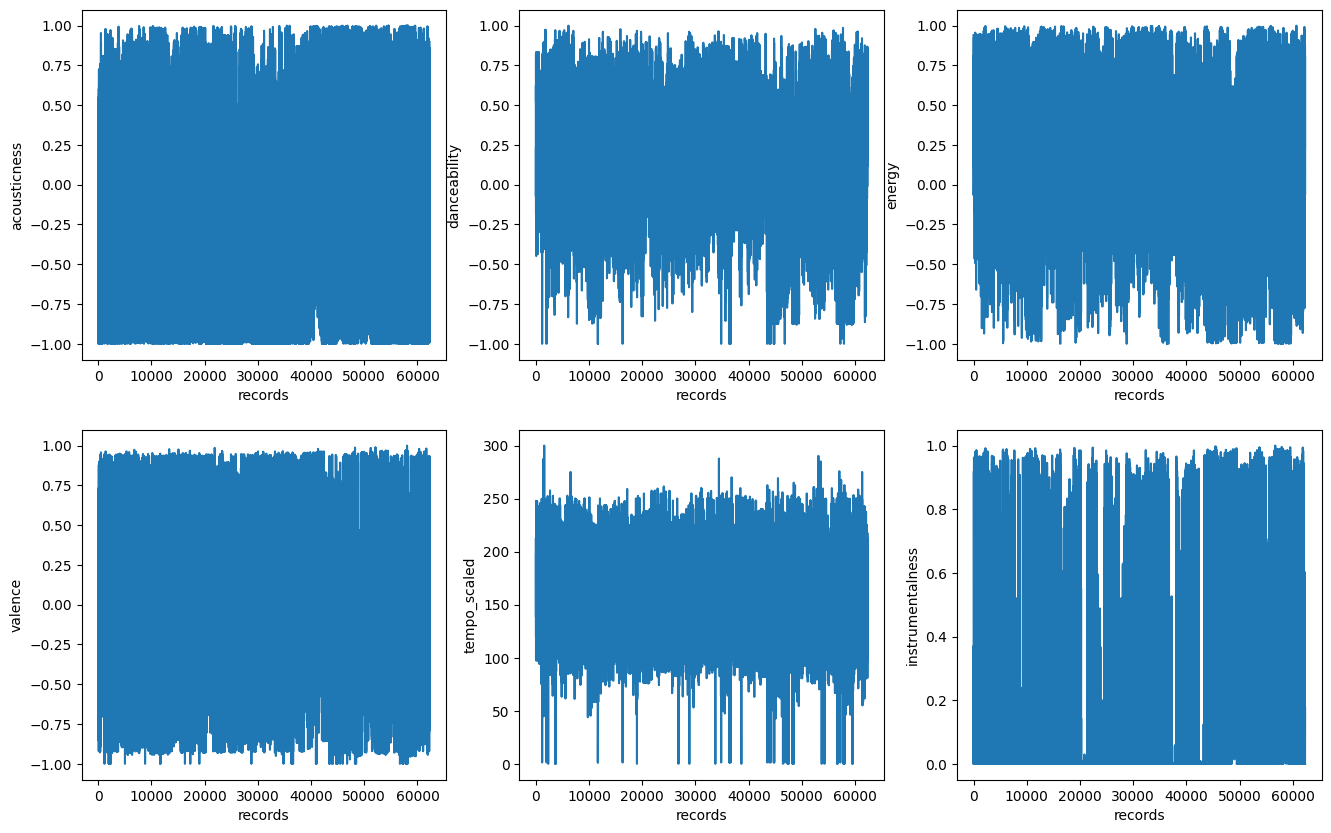

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
plt.plot(range(len(df)),df['acousticness'])
plt.xlabel('records')
plt.ylabel('acousticness')

plt.subplot(2, 3, 2)
plt.plot(range(len(df)),df['danceability'])
plt.xlabel('records')
plt.ylabel('danceability')

plt.subplot(2, 3, 3)
plt.plot(range(len(df)),df['energy'])
plt.xlabel('records')
plt.ylabel('energy')

plt.subplot(2, 3, 4)
plt.plot(range(len(df)),df['valence'])
plt.xlabel('records')
plt.ylabel('valence')

plt.subplot(2, 3, 5)
plt.plot(range(len(df)),df['tempo_scaled'])
plt.xlabel('records')
plt.ylabel('tempo_scaled')

plt.subplot(2, 3, 6)
plt.plot(range(len(df)),df['instrumentalness'])
plt.xlabel('records')
plt.ylabel('instrumentalness')

plt.plot()

In [24]:
print(len(df))

62317


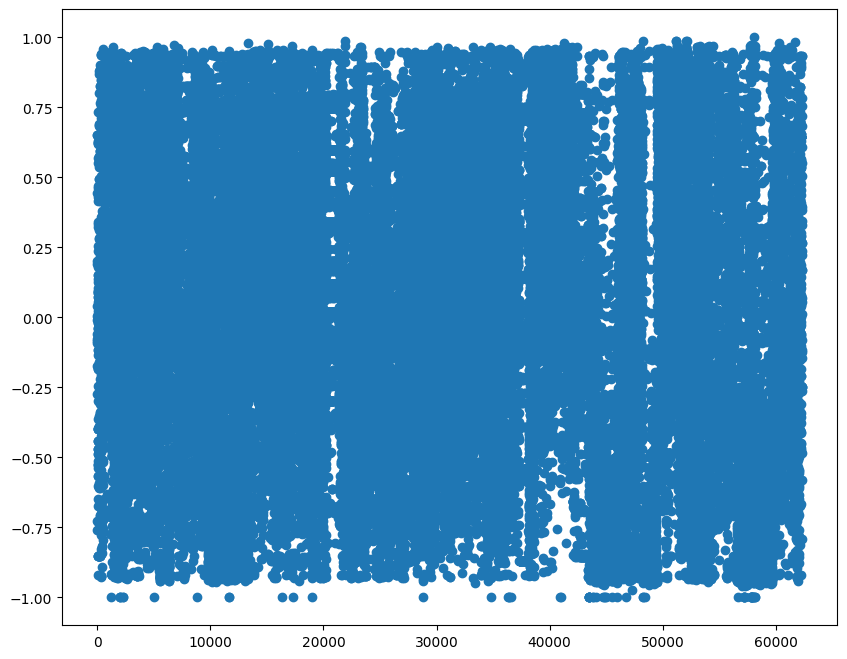

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(len(df)), df['valence'], 'o')
plt.show()

In [132]:
df=df.drop(columns=['track_id', 'track_name', 'artist_name', 'artwork_url', 'album_name', 'track_url', 'key', 'mode', 'popularity', 'time_signature', 'year', 'tempo'])
df.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,language,genre,tempo_scaled
0,-0.951606,0.527383,97297.0,0.940,0.055355,0.100200,0.362973,0.107404,-0.077387,Tamil,Electronic/Dance,139.432709
1,-0.829116,0.582150,207369.0,0.586,0.000000,0.095291,0.362973,0.099270,0.650251,Tamil,Electronic/Dance,206.658505


In [154]:
ndf=pd.get_dummies(df, columns=['language', 'genre'], dtype=int)
ndf.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo_scaled,...,genre_Classical/Instrumental,genre_Electronic/Dance,genre_Folk/Acoustic,genre_Hip-Hop/Rap,genre_Jazz/Blues,genre_Lo-Fi/Chill,genre_Metal,genre_Pop,genre_Reggae/Latin,genre_Rock/Alternative
0,-0.951606,0.527383,97297.0,0.940,0.055355,0.100200,0.362973,0.107404,-0.077387,139.432709,...,0,1,0,0,0,0,0,0,0,0
1,-0.829116,0.582150,207369.0,0.586,0.000000,0.095291,0.362973,0.099270,0.650251,206.658505,...,0,1,0,0,0,0,0,0,0,0


In [155]:
ndf.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo_scaled', 'Cluster', 'language_English', 'language_Hindi',
       'language_Korean', 'language_Malayalam', 'language_Tamil',
       'language_Telugu', 'language_Unknown', 'genre_Classical/Instrumental',
       'genre_Electronic/Dance', 'genre_Folk/Acoustic', 'genre_Hip-Hop/Rap',
       'genre_Jazz/Blues', 'genre_Lo-Fi/Chill', 'genre_Metal', 'genre_Pop',
       'genre_Reggae/Latin', 'genre_Rock/Alternative'],
      dtype='object')

In [ ]:
# ndf.columns
ndf = pd.DataFrame(ndf, columns=['acousticness',
       'instrumentalness','valence', 'energy',
       'danceability', 'tempo_scaled',
       'liveness', 'loudness', 'speechiness',
       'language_English', 'language_Hindi', 'language_Korean',
       'language_Malayalam', 'language_Tamil', 'language_Telugu',
       'language_Unknown'])

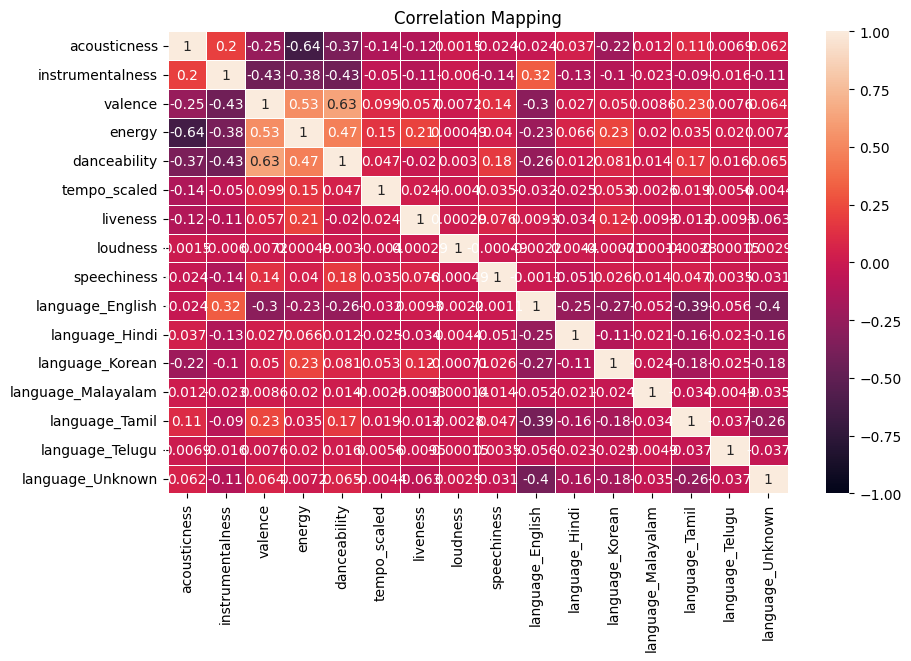

In [157]:
plt.figure(figsize=(10,6))
sns.heatmap(ndf.corr(), vmin = -1, vmax=1, annot=True, linewidths=0.5)
plt.title('Correlation Mapping')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
# scaler = MinMaxScaler(range=(-1,1))
# ndf_scaled = scaler.fit_transform(ndf)
# ndf_scaled_df=pd.DataFrame(ndf_scaled, columns = ndf.columns)

TypeError: MinMaxScaler.__init__() got an unexpected keyword argument 'range'

In [158]:
ndf_scaled_df = ndf.copy()

In [159]:
ndf_scaled_df.head(2)

,acousticness,instrumentalness,valence,energy,danceability,tempo_scaled,liveness,loudness,speechiness,language_English,language_Hindi,language_Korean,language_Malayalam,language_Tamil,language_Telugu,language_Unknown
0,-0.951606,0.055355,-0.077387,0.940,0.527383,139.432709,0.100200,0.362973,0.107404,0,0,0,0,1,0,0
1,-0.829116,0.000000,0.650251,0.586,0.582150,206.658505,0.095291,0.362973,0.099270,0,0,0,0,1,0,0


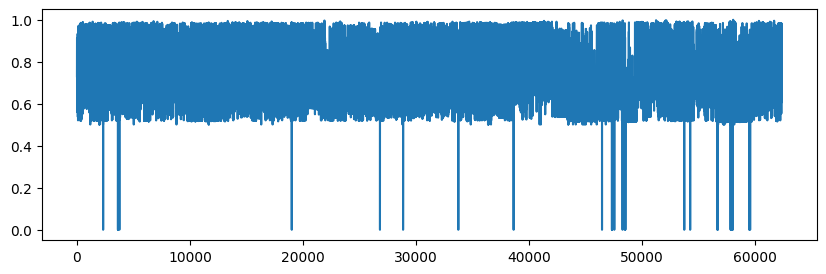

In [ ]:
# plt.figure(figsize=(10,3))
# plt.plot(ndf_scaled_df['valence'][0:])
# plt.show()

In [123]:
ndf_scaled_df.describe()

,acousticness,instrumentalness,valence,energy,danceability,tempo_scaled,liveness,loudness,language_English,language_Hindi,...,genre_Classical/Instrumental,genre_Electronic/Dance,genre_Folk/Acoustic,genre_Hip-Hop/Rap,genre_Jazz/Blues,genre_Lo-Fi/Chill,genre_Metal,genre_Pop,genre_Reggae/Latin,genre_Rock/Alternative
count,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,...,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000
mean,-0.271056,0.146923,-0.002868,0.206834,0.212419,148.065627,0.195165,0.362980,0.375371,0.092110,...,0.063289,0.230932,0.153136,0.020749,0.163759,0.016833,0.070318,0.137314,0.015726,0.127943
std,0.628419,0.306929,0.527445,0.486394,0.369822,35.493371,0.170033,0.003552,0.484222,0.289183,...,0.243485,0.421433,0.360122,0.142543,0.370060,0.128648,0.255684,0.344181,0.124415,0.334029
min,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.864659,0.000000,-0.411055,-0.120000,0.010142,120.689712,0.093387,0.362973,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.425703,0.000025,0.021106,0.278000,0.279919,148.140017,0.125251,0.362973,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.269076,0.015215,0.427136,0.606000,0.480730,169.416525,0.243487,0.362973,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,300.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
samples = 27000
sampled_df = ndf_scaled_df.sample(n=samples, random_state=42)

In [59]:
from sklearn.cluster import KMeans

In [161]:
inertia = []
k_range = range(2, 17)

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(sampled_df)
    inertia.append(kmeans.inertia_)

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

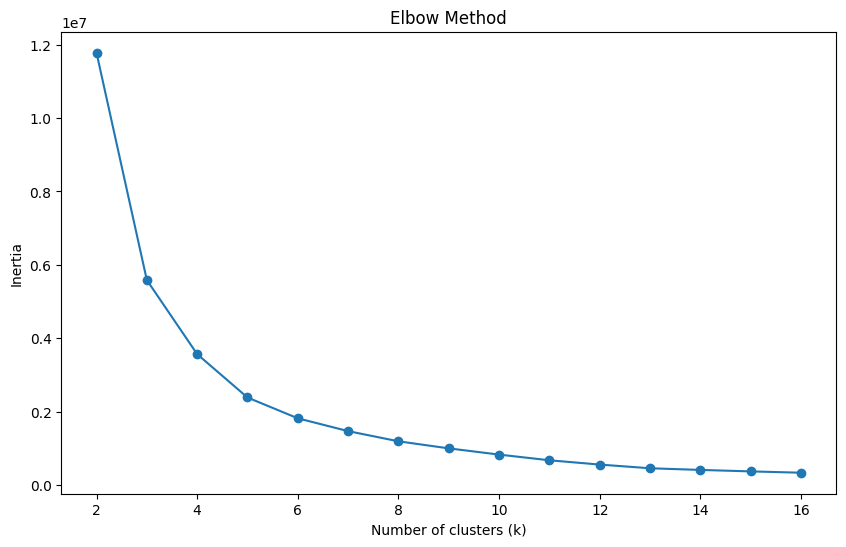

In [162]:
plt.figure(figsize=(10,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

In [163]:
s_score = []

for i in range(2,17):
    optimal_k = i
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_df)
    t = silhouette_score(sampled_df, cluster_labels)
    s_score.append(t)

print(s_score)
    

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

[0.5669379945771141, 0.5719343363120171, 0.5245281378252654, 0.5310071493080157, 0.5197769879284064, 0.518609351366443, 0.5186089556342253, 0.5067954245207718, 0.5025156797385901, 0.504101492153185, 0.5058583539935207, 0.5131768263027425, 0.4953850420452909, 0.4877180949887939, 0.4753124014991967]


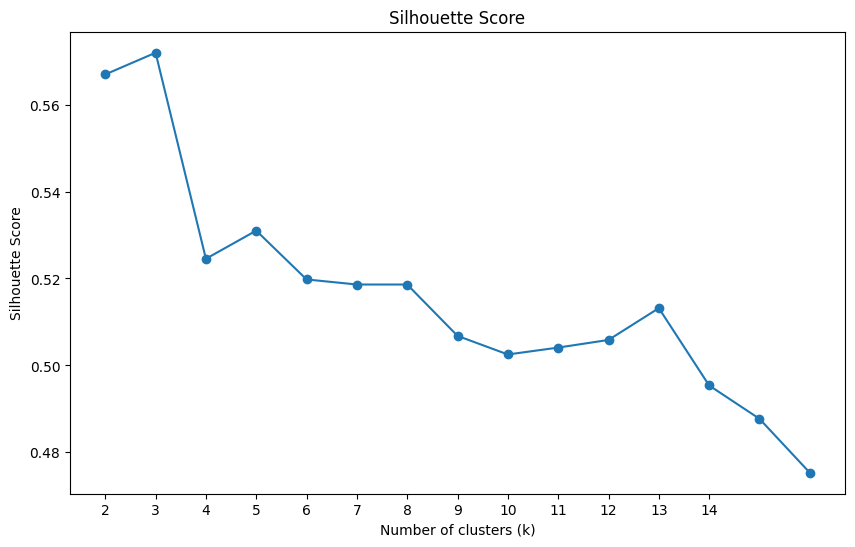

In [164]:
plt.figure(figsize=(10,6))
plt.plot(range(2,17),s_score, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,15))
plt.show()

In [ ]:
optimal_k = 5
#Also assign clusters to the main dataset
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit(ndf_scaled_df)
df['Cluster'] = cluster_labels  #use data instead of df to edit the original data

In [38]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=6)
pca.fit(sampled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

[0.99846644 0.99900421 0.99930305 0.99947866 0.99961852]


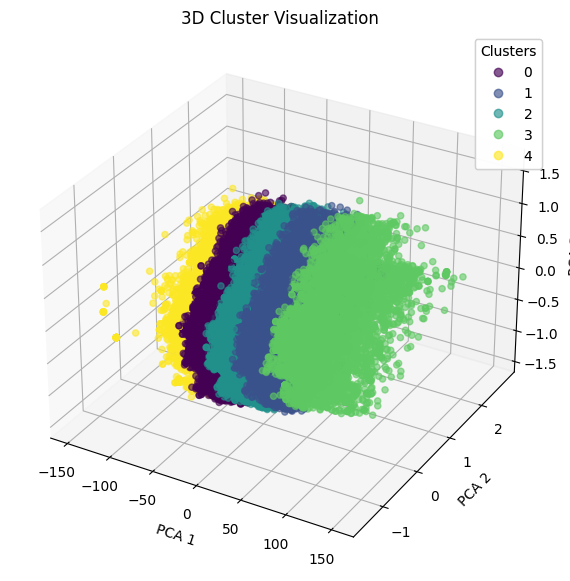

In [182]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(ndf_scaled_df)

# Create a 3D figure
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], c=cluster_labels, cmap='viridis', alpha=0.6)

# Labels and title
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Cluster Visualization")

# Add color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)


# Show plot
plt.show()

In [176]:
from sklearn.metrics import davies_bouldin_score

In [183]:
dbi_score = davies_bouldin_score(df_pca, cluster_labels)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 0.5359718446186253


In [189]:
data.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language', 'genre', 'tempo_scaled', 'Cluster'],
      dtype='object')

In [191]:
export = pd.DataFrame(data)
export.to_csv('dataset/spotify_tracks_clustered_exported.csv', index=False)

In [ ]:
#exporting models
# import joblib

In [ ]:
# kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
# kmeans.fit(ndf_scaled_df)
# joblib.dump(kmeans, 'dataset/kmeans_model.pkl')

['dataset/kmeans_model.pkl']

In [ ]:
# kmeans = joblib.load('dataset/kmeans_model.pkl')
# cluster_labels = kmeans.predict(ndf_scaled_df)
# df['Cluster'] = cluster_labels
# print(df['Cluster'].head())


0    0
1    3
2    3
3    3
4    2
Name: Cluster, dtype: int32
